**Save and reload the network**

In [19]:
import torch
import matplotlib.pyplot as plt
import time

In [5]:
# for data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
print('x: ', x)
print('y: ', y)
print('x shape: ', x.shape)
print('y shape: ', y.shape)

x:  tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        

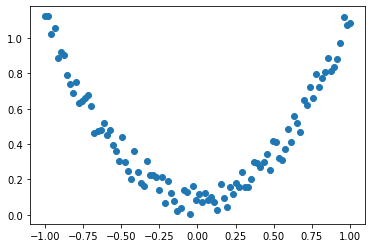

In [4]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [9]:
def save():
  net1 = torch.nn.Sequential(
      torch.nn.Linear(1,10),
      torch.nn.ReLU(),
      torch.nn.Linear(10,1)
  )
  optimizer = torch.optim.SGD(params=net1.parameters(),lr=0.5)
  loss_func = torch.nn.MSELoss()

  # Training
  for epoch in range(100):
    prediction = net1(x)
    loss = loss_func(prediction,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  # save the entire net
  torch.save(net1, 'net.pkl')
  # save the parameters
  torch.save(net1.state_dict(), 'net_params.pkl')


  ##################### for visualization #####################
  plt.figure(1, figsize=(10, 3))
  plt.subplot(131)
  plt.title('Net1')
  plt.scatter(x.data.numpy(), y.data.numpy())
  plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [15]:
def restore_net():
  net2 = torch.load('net.pkl')
  prediction = net2(x)

  ##################### for visualization #####################
  plt.subplot(132)
  plt.title('Net2')
  plt.scatter(x.data.numpy(), y.data.numpy())
  plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


In [16]:
def restore_params():
  net3 = torch.nn.Sequential(
      torch.nn.Linear(1,10),
      torch.nn.ReLU(),
      torch.nn.Linear(10,1)
  )
  net3.load_state_dict(torch.load('net_params.pkl'))

  prediction = net3(x)

  ##################### for visualization #####################
  plt.subplot(133)
  plt.title('Net1')
  plt.scatter(x.data.numpy(), y.data.numpy())
  plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

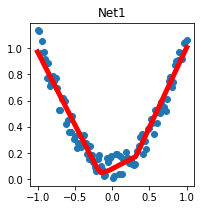

In [12]:
save()

running time:  0.05124545097351074


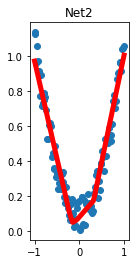

In [20]:
start = time.time()

restore_net()

end = time.time()
print('running time: ', end-start)

running time:  0.03876614570617676


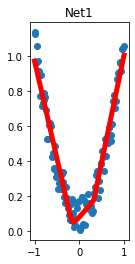

In [21]:
start = time.time()

restore_params()

end = time.time()
print('running time: ', end-start)